In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
df.shape

(11162, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df[(df['poutcome'] == "success") & (df['deposit'] == "yes")].sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3428,30,student,single,tertiary,no,7529,no,no,cellular,20,apr,175,6,183,1,success,yes
3250,60,retired,divorced,secondary,no,1,no,no,cellular,19,feb,302,1,184,1,success,yes
3419,36,blue-collar,married,primary,no,1177,no,no,cellular,15,apr,330,1,311,4,success,yes
3338,35,blue-collar,married,secondary,no,262,no,no,cellular,15,mar,427,1,181,3,success,yes
3444,73,retired,married,primary,no,796,no,no,cellular,23,apr,888,1,182,3,success,yes


In [9]:
df[(df['poutcome'] == "success") & (df['deposit'] == "no")].sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5437,32,management,single,tertiary,no,307,no,no,cellular,25,jan,96,1,201,3,success,no
6731,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
10149,48,management,married,tertiary,no,3842,no,no,cellular,1,oct,168,1,122,2,success,no
10570,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
10250,54,admin.,divorced,secondary,no,0,yes,yes,cellular,4,feb,330,1,182,3,success,no


In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [11]:
#finding categorical feature
categorical_features = [feature for feature in df.columns if ((df[feature].dtype == "O") & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [12]:
for feature in categorical_features:
    print(f"{feature}: {len(df[feature].unique())}")

job: 12
marital: 3
education: 4
default: 2
housing: 2
loan: 2
contact: 3
month: 12
poutcome: 4


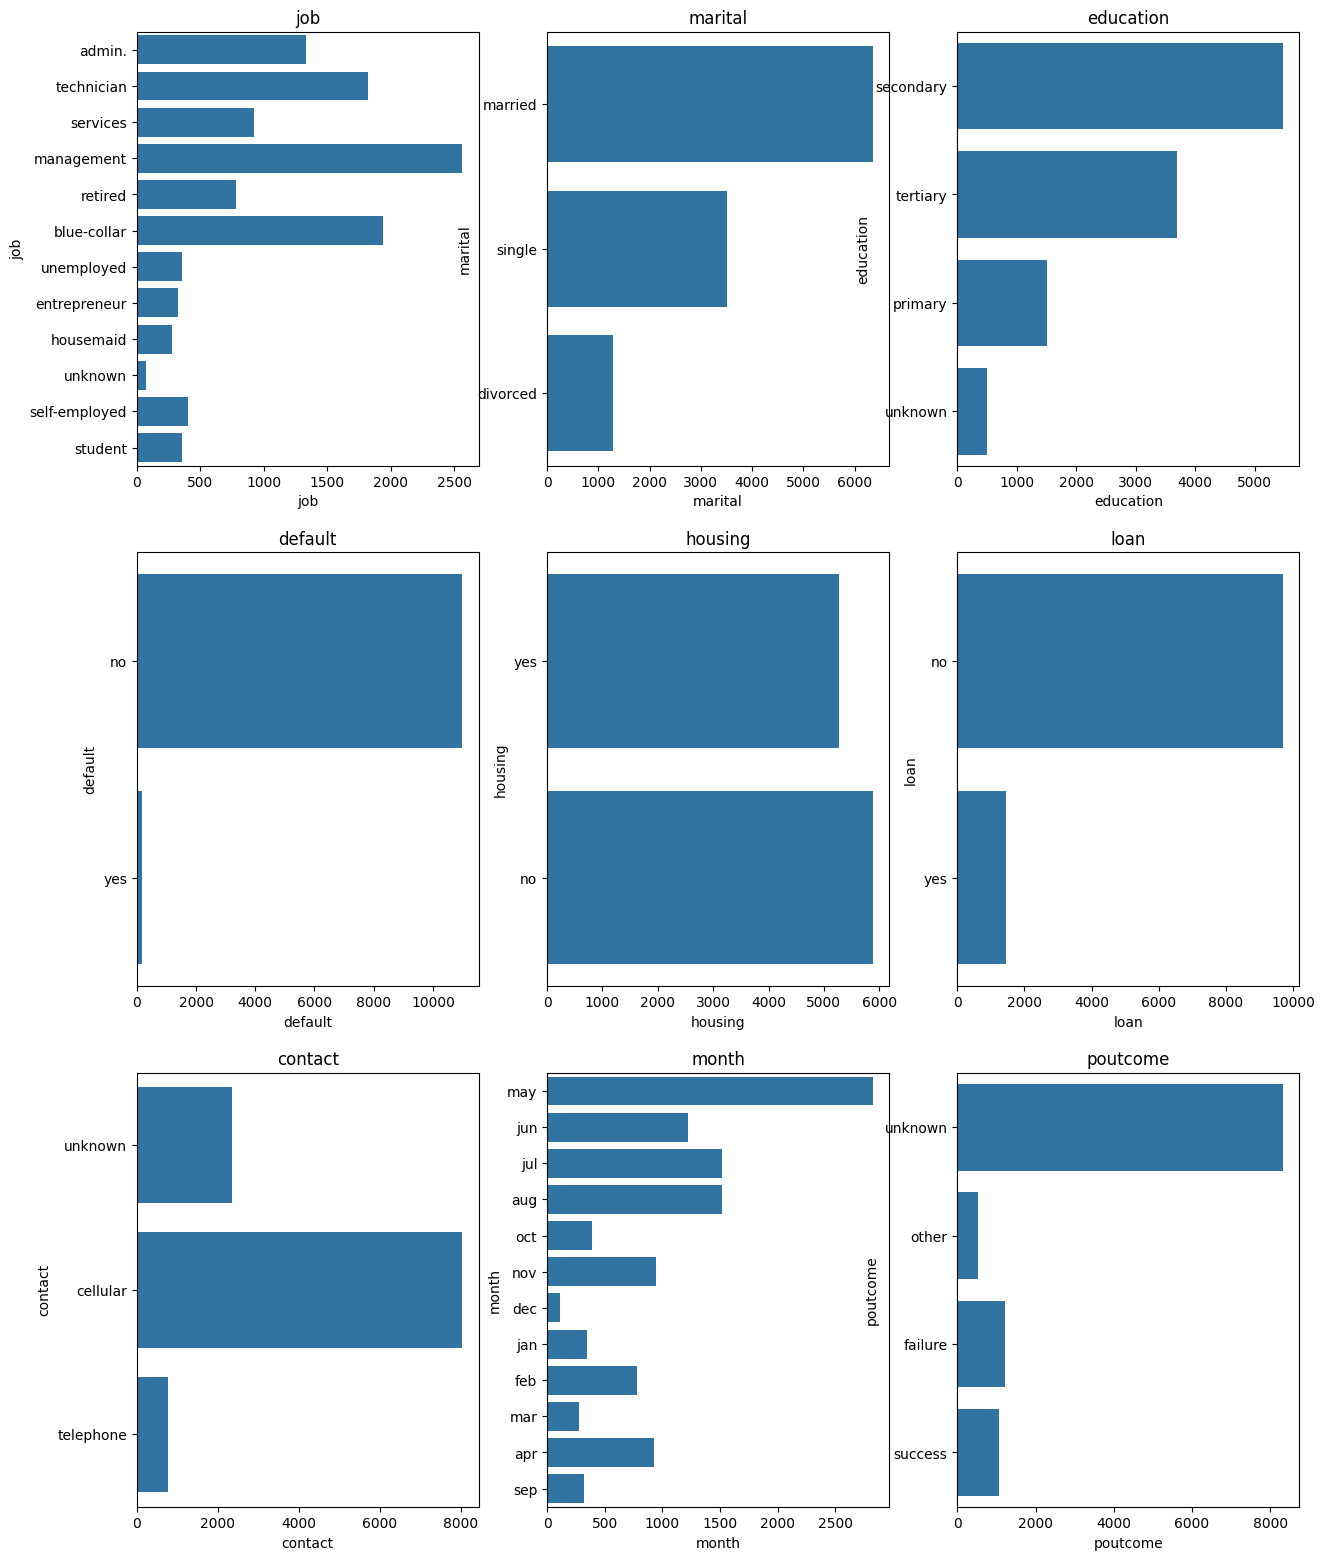

In [13]:
plt.figure(figsize=(15,80))
plot_number = 1
for categorical_feature in categorical_features :
    ax = plt.subplot(12,3,plot_number)
    sns.countplot(y = categorical_feature ,data = df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plot_number += 1

plt.show()

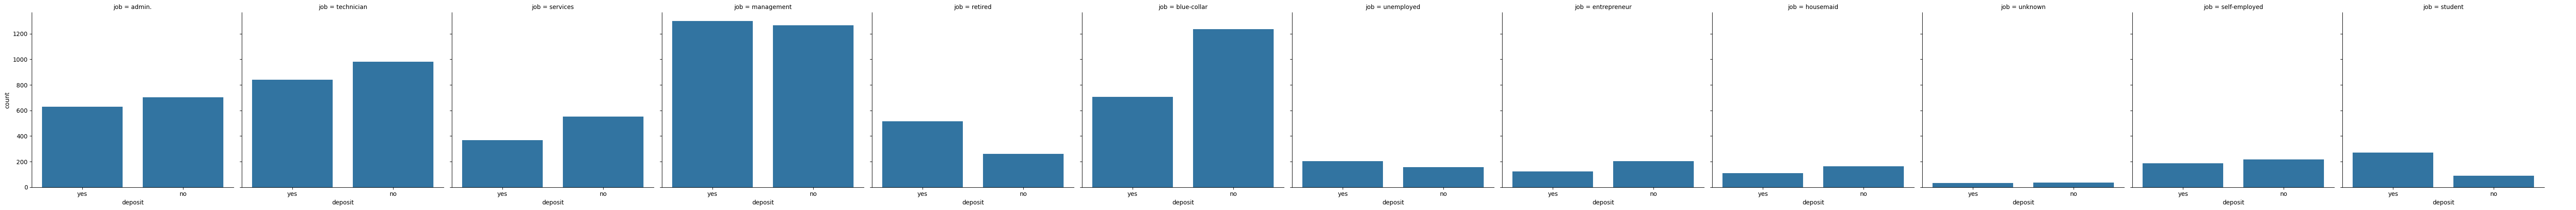

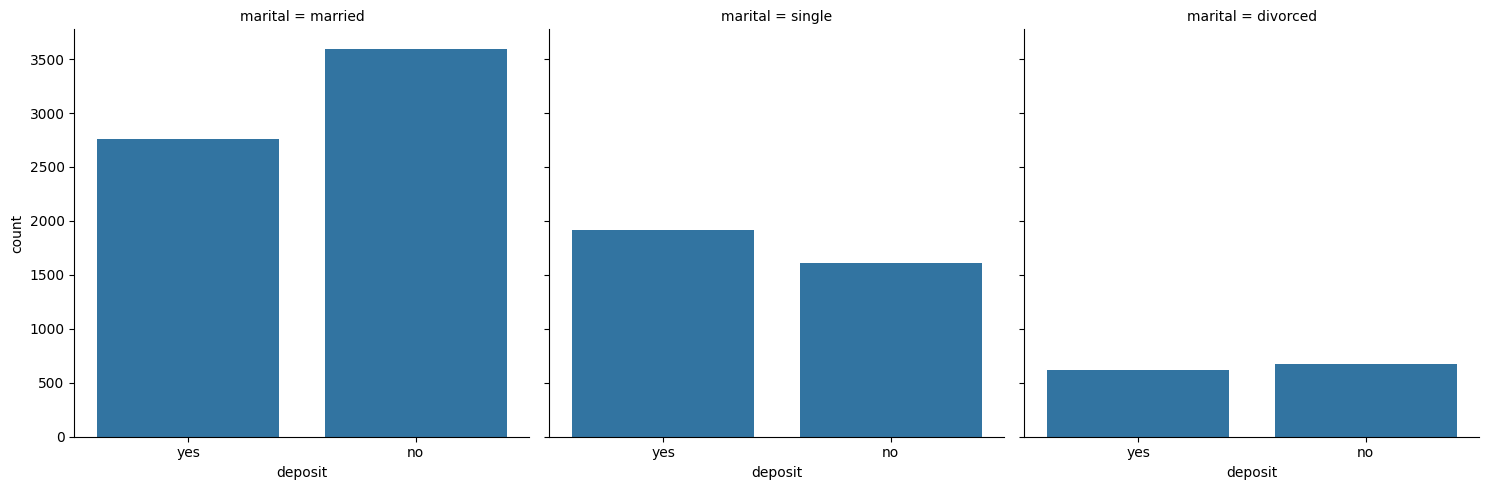

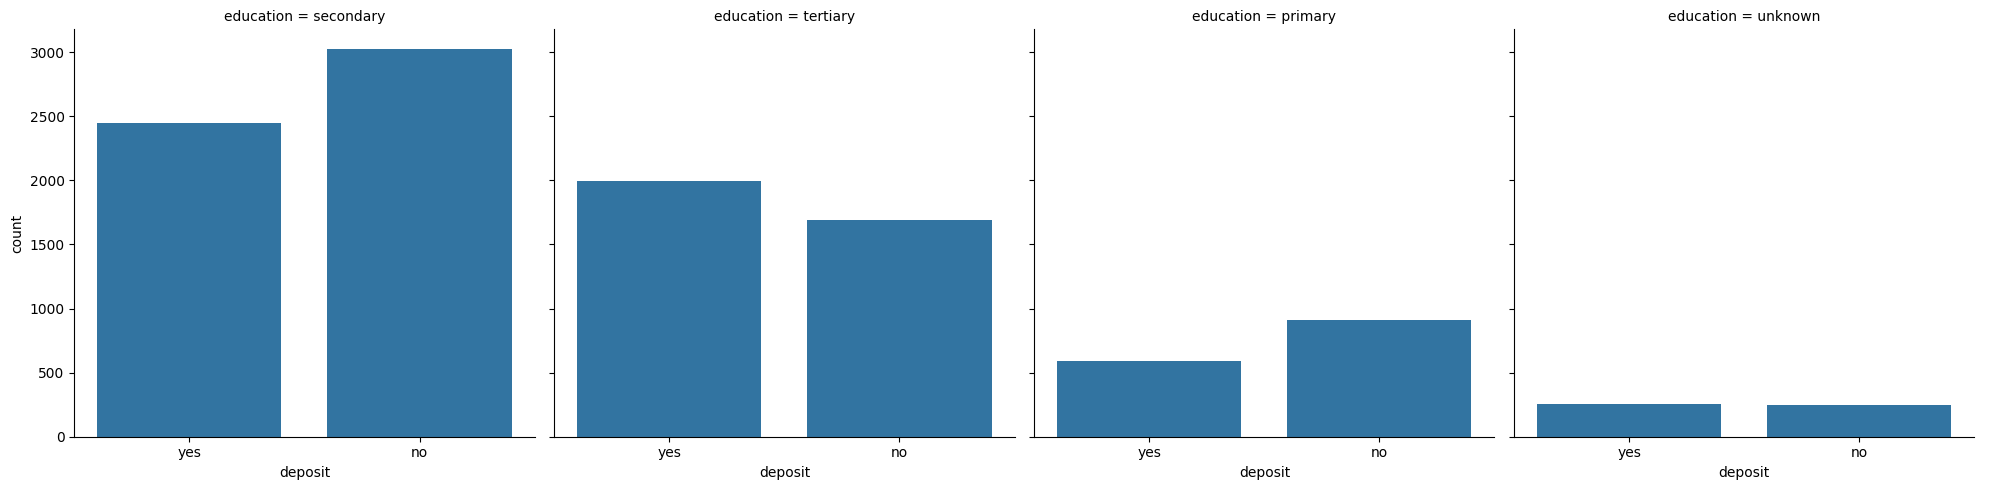

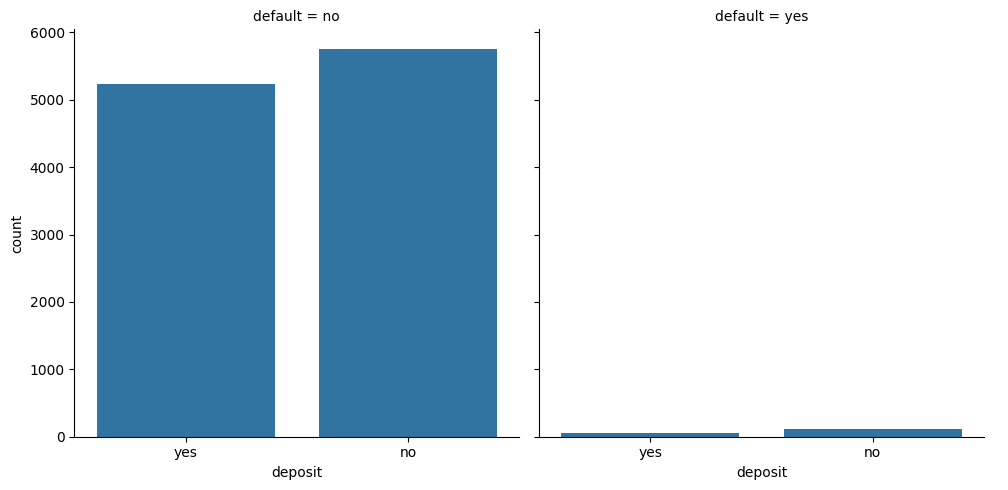

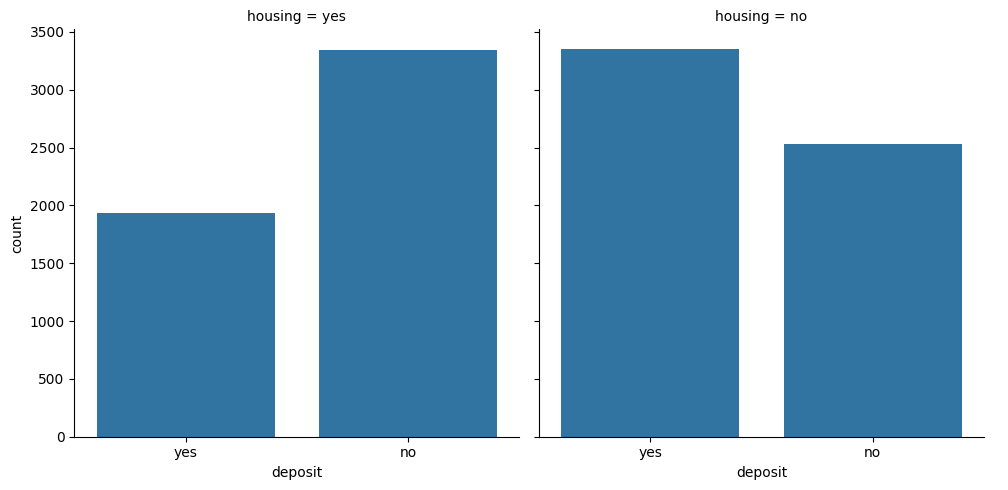

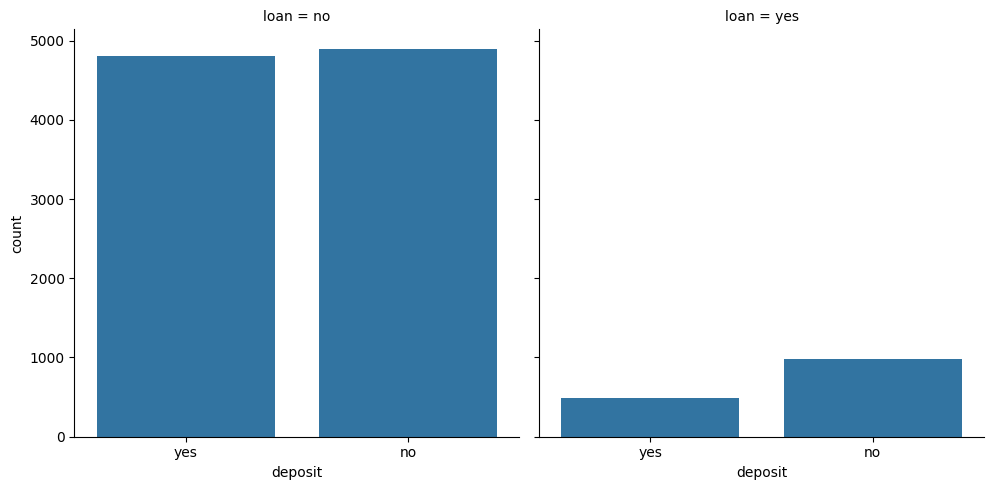

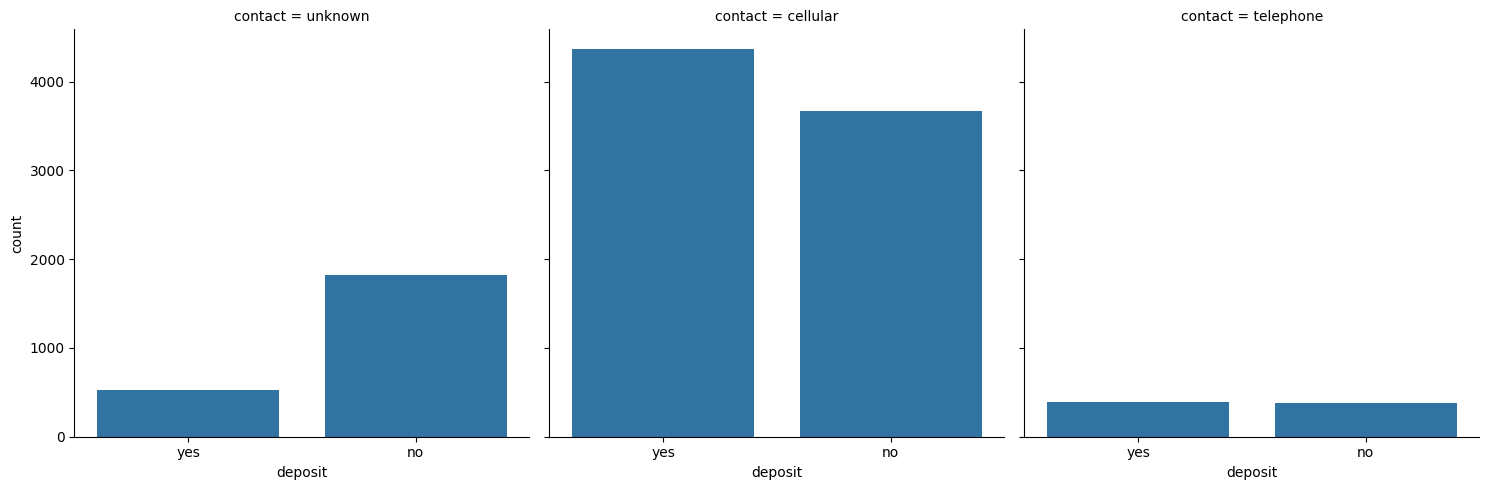

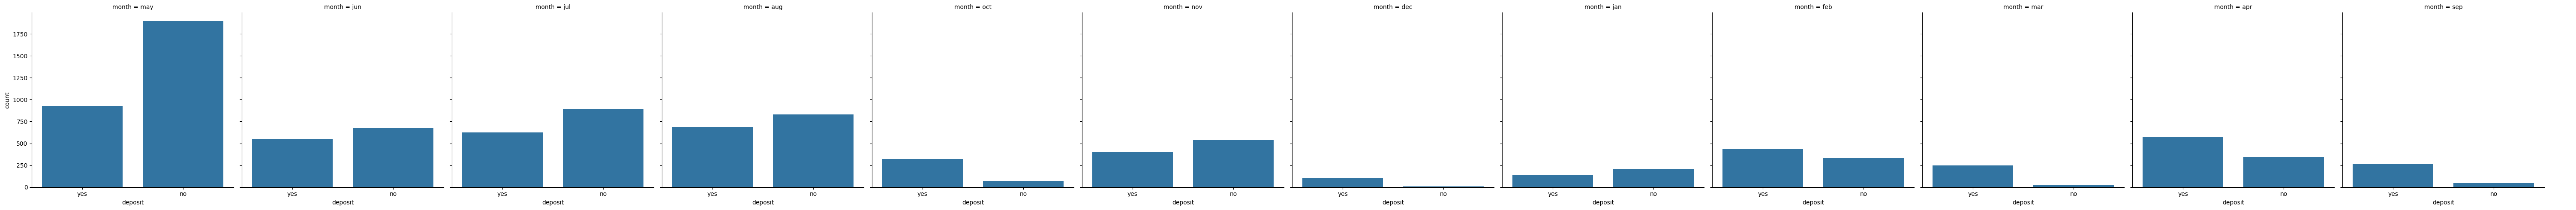

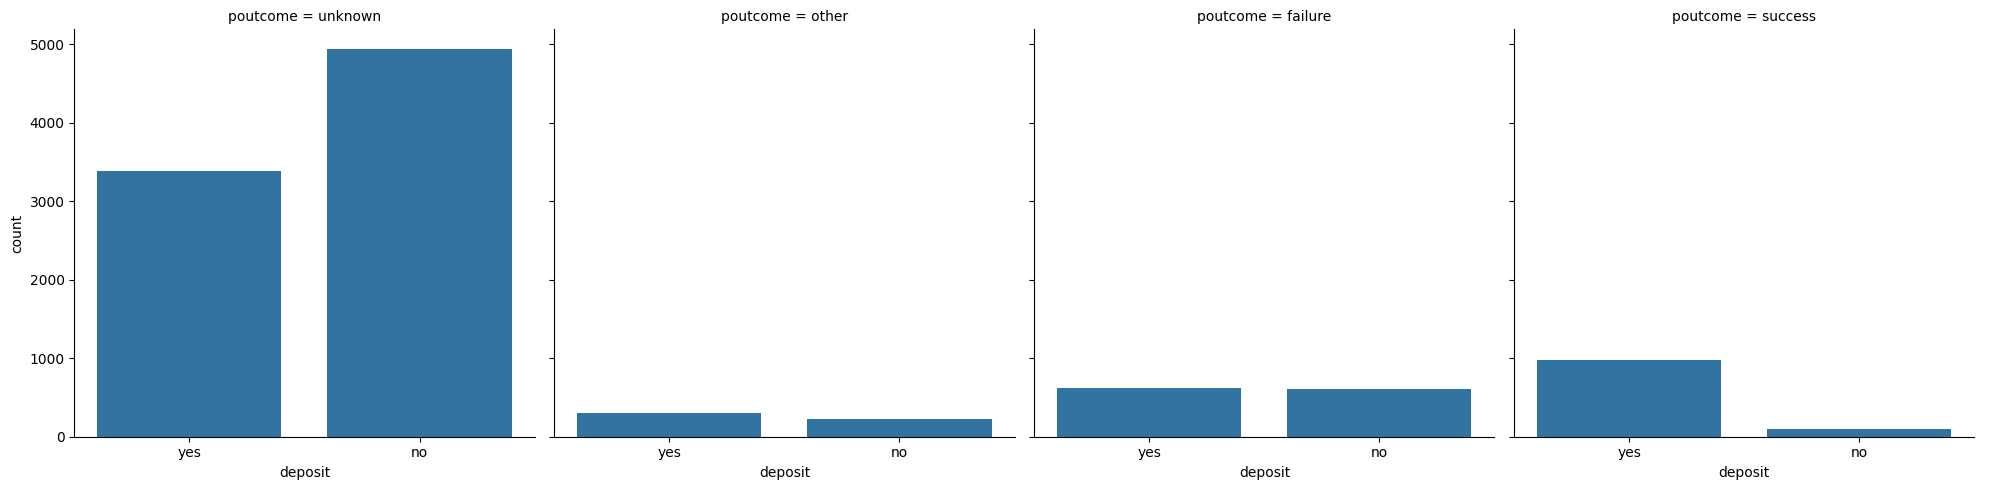

In [14]:
for categorical_feature in categorical_features:
    sns.catplot(x = 'deposit', col= categorical_feature ,kind='count', data= df)
plt.show()

In [15]:
# df['job'].value_counts()
df['job'][(df['deposit'] == "yes")].value_counts()

job
management       1301
technician        840
blue-collar       708
admin.            631
retired           516
services          369
student           269
unemployed        202
self-employed     187
entrepreneur      123
housemaid         109
unknown            34
Name: count, dtype: int64

In [16]:
df['job'][(df['deposit'] == "no")].value_counts()

job
management       1265
blue-collar      1236
technician        983
admin.            703
services          554
retired           262
self-employed     218
entrepreneur      205
housemaid         165
unemployed        155
student            91
unknown            36
Name: count, dtype: int64

<Axes: xlabel='deposit', ylabel='job'>

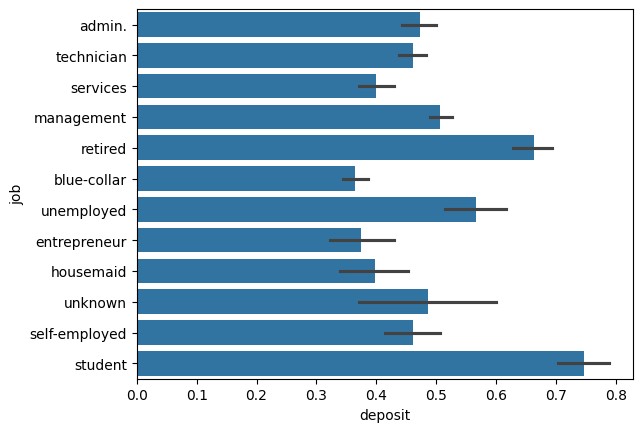

In [17]:
sns.barplot(y = 'job', x = (df['deposit']=="yes") , data= df)

<Axes: xlabel='deposit', ylabel='job'>

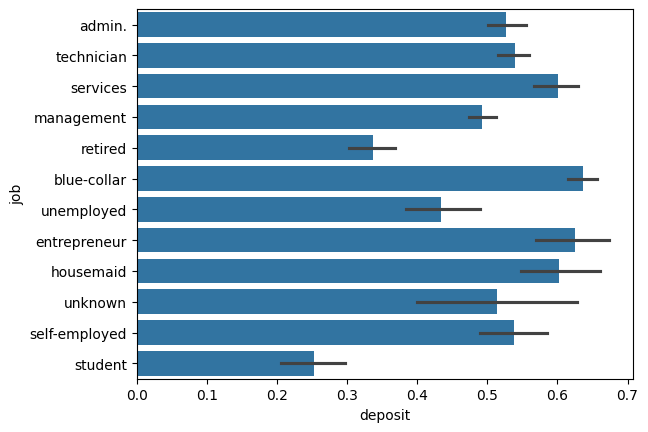

In [18]:
sns.barplot(y = 'job', x = (df['deposit']=="no") , data= df)

In [19]:
pd.crosstab(df['job'], df['deposit']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

deposit,no,yes
job,,
admin.,52.7,47.3
blue-collar,63.6,36.4
entrepreneur,62.5,37.5
housemaid,60.2,39.8
management,49.3,50.7
retired,33.7,66.3
self-employed,53.8,46.2
services,60.0,40.0
student,25.3,74.7


In [20]:
pd.crosstab(df['month'], df['deposit']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

deposit,no,yes
month,,
apr,37.5,62.5
aug,54.7,45.3
dec,9.1,90.9
feb,43.2,56.8
jan,58.7,41.3
jul,58.6,41.4
jun,55.3,44.7
mar,10.1,89.9
may,67.2,32.8


In [21]:
pd.crosstab(df['job'], df['deposit']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

deposit,no,yes
job,,
admin.,52.7,47.3
blue-collar,63.6,36.4
entrepreneur,62.5,37.5
housemaid,60.2,39.8
management,49.3,50.7
retired,33.7,66.3
self-employed,53.8,46.2
services,60.0,40.0
student,25.3,74.7


In [ ]:
df[['job','balance',"deposit"]].sample(10)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1267409582.py, line 1)